In [1]:
import numpy as np
import pandas as pd
import string

from cycler import cycler
import matplotlib.pyplot as plt
from resonance.neuralnodes import utils
from resonance import plotting
import scipy.interpolate
import scipy.ndimage

from resonance.raf.params import Params
from resonance.raf.model import run_model

alphabet = list(string.ascii_uppercase)
plt.style.use('ncb.mplstyle')

## Generate model outputs

In [2]:
fs = 10_000.0
stim_step = 0.1
max_len = 20

input_stim, s, paui, duri = utils.makePPFstim(ppauMax=max_len, pdurMax=max_len, cdur=400, cpau=0, Fs=fs, step=stim_step)

input_stim = np.array(input_stim)
new_points = np.array([s['ppau'], s['pdur']]).T / fs * 1000
paui = paui / fs * 1000
duri = duri / fs * 1000

params = Params.from_yaml('params/raf_20230130_180027_51_params.yaml')
print(params)
outs = run_model(input_stim, np.array(params.to_list()), fs)
outs[0].shape
ppf = np.nanmean(outs[2][250:-100], axis=0)

ppf = ppf.reshape((len(duri), len(paui)))
ppf = scipy.ndimage.gaussian_filter(ppf, stim_step * 40)


Params(stim_gain=0.02722601367753088, damping=-0.0005023775272760689, frequency=109.3414210774548, output_gain=0.0024531661930946485)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
input_stim, s, paui, duri = utils.makePPFstim(ppauMax=max_len, pdurMax=max_len, cdur=400, cpau=0, Fs=fs, step=stim_step)

input_stim = np.array(input_stim)
new_points = np.array([s['ppau'], s['pdur']]).T / fs * 1000
paui = paui / fs * 1000
duri = duri / fs * 1000


/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_9227/2685796079.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


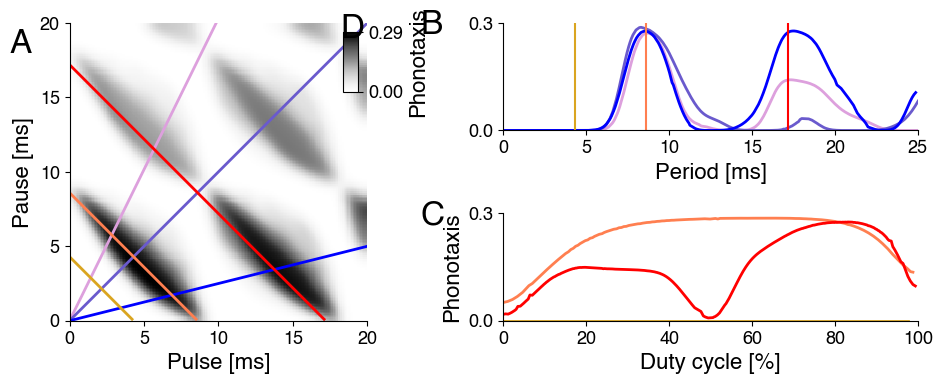

In [4]:
fig, axs = plt.subplot_mosaic(
    '''
    AB
    AC
    ''',
    figsize=(10, 4))

plotting.ppf(duri, paui, ppf, ax=axs['A'])

# period transects
col_dc = ['plum', 'slateblue', 'blue']
plt.sca(axs['B'])
for dc, col in zip([0.33, 0.5, 0.8], col_dc):
    dur = np.arange(0, max_len+0.1, 0.01)
    pau = dur / dc - dur
    dur = dur[pau <= max_len]
    pau = pau[pau <= max_len]
    axs['A'].plot(dur, pau, c=col, linewidth=2)
    plt.plot(pau+dur, plotting.transect(new_points, ppf, dur, pau, grid=False), c=col, label=f'dc {dc}', linewidth=2.0)
plt.xlabel('Period [ms]')
plt.axvline(4.3, c='goldenrod')
plt.axvline(8.6, c='coral')
plt.axvline(17.2, c='red')
plt.xlim(0, 25)
plt.ylim(0)
plt.yticks([0, 0.3])
# plt.legend(frameon=False)

# DC transects
col_per = ['goldenrod', 'coral', 'red']
plt.sca(axs['C'])
per = 10
for per, frq, col in zip([4.3, 8.6, 17.2], ['2f', 'f', 'f/2'], col_per):
    pau = np.arange(0.1, per, 0.01)
    dur = per - pau
    dc = dur / per
    dur = dur[pau <= max_len]
    pau = pau[pau <= max_len]
    axs['A'].plot(dur, pau, c=col, linewidth=2)
    plt.plot(dc*100, plotting.transect(new_points, ppf, dur, pau, grid=False), c=col, label=f'per {per} ms ({frq})', linewidth=2.0)
plt.xlabel('Duty cycle [%]')
plt.ylabel('Phonotaxis')
plt.xlim(0, 100)
plt.ylim(0)
plt.yticks([0, 0.3])

plotting.label_axes()
plt.tight_layout()

plt.savefig('fig/Fig_raf.pdf')

#### Freq tune

<>:71: SyntaxWarning: invalid escape sequence '\D'
<>:71: SyntaxWarning: invalid escape sequence '\D'
<>:71: SyntaxWarning: invalid escape sequence '\D'
<>:71: SyntaxWarning: invalid escape sequence '\D'
<>:71: SyntaxWarning: invalid escape sequence '\D'
<>:71: SyntaxWarning: invalid escape sequence '\D'
/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_9227/2151824999.py:71: SyntaxWarning: invalid escape sequence '\D'
  for f, c, l in zip([2/T, 1/T, 1/T/2], col_per, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$']):
/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_9227/2151824999.py:71: SyntaxWarning: invalid escape sequence '\D'
  for f, c, l in zip([2/T, 1/T, 1/T/2], col_per, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$']):
/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_9227/2151824999.py:71: SyntaxWarning: invalid escape sequence '\D'
  for f, c, l in zip([2/T, 1/T, 1/T/2], col_per, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$']):


ppers [34.4, 17.2, 8.6, 5.73, 4.3]
pdurs [11.35, 5.68, 2.84, 1.89, 1.42]
ppaus [23.05, 11.52, 5.76, 3.84, 2.88]
pdcs [0.33, 0.33, 0.33, 0.33, 0.33]
400 930


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


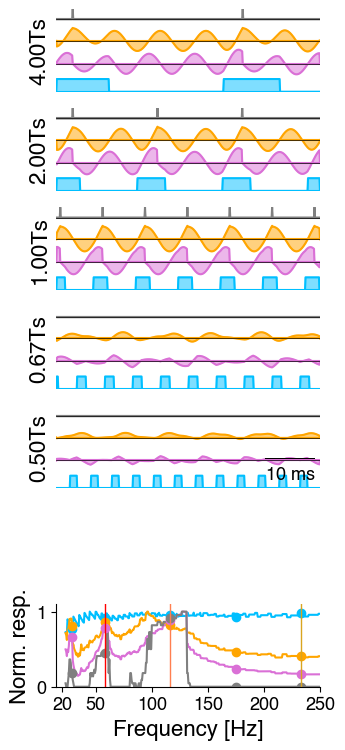

In [6]:
dt = fs / 1000
T = 8.6#1000/109.3414210774548

ppers = T / np.array((0.25, 0.5,   1 ,  1.5,   2))
pdurs= ppers * 0.33
ppaus= ppers - pdurs
pdcs = pdurs / ppers
print('ppers', [float(f"{p:1.2f}") for p in (pdurs + ppaus)])
print('pdurs', [float(f"{p:1.2f}") for p in pdurs])
print('ppaus', [float(f"{p:1.2f}") for p in ppaus])
print('pdcs', [float(f"{p:1.2f}") for p in pdcs])

cols = ['deepskyblue', 'orange', 'orchid', 'grey']
custom_cycler = cycler(color=cols)

input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)
input_stim = np.array(input_stim)
params = Params.from_yaml('params/raf_20230130_180027_51_params.yaml')
outs = run_model(input_stim, np.array(params.to_list()), fs)

tuning_coarse = np.array([np.nanmean(np.clip(out[250:-100, :], 0, np.inf), axis=0) for out in np.array(outs)[[3,0,1,2]]]).T
ppers_coarse = ppers

t0 = 400
t1 = t0 + 530
print(t0, t1)
stis = np.arange(len(ppers))
# titles = [f'pper {pper:1.1f}ms, dc{int(pdc * 100)}' for pper, pdc in zip(ppers, pdcs)]
# titles = [f'pper {pper:1.1f}ms' for pper, pdc in zip(ppers, pdcs)]
titles = [f'{pper/T:1.2f}Ts' for pper, pdc in zip(ppers, pdcs)]

plt.figure(figsize=(7.5, 8.8))
for cnt, (sti, title) in enumerate(zip(stis, titles)):

    ax = plt.subplot(len(ppers) + 2, 2, 2*cnt+1)
    plt.ylabel(title)#, loc='left', fontdict={'fontsize': 8})
    plotting.pulse(outs[3][t0:t1, sti], c='deepskyblue', dt=dt)
    plotting.pulse(outs[1][t0:t1, sti], offset=2.2, c='orchid', dt=dt)
    plotting.pulse(outs[0][t0:t1, sti], offset=4, c='orange', dt=dt)
    plotting.pulse(outs[2][t0:t1, sti]/30, offset=5.7, c='grey', dt=dt)

    plt.xlim(0 / dt, (t1-t0) / dt)
    plt.ylim(0, 6.5)
    plotting.despine('tbrl')

plotting.scalebar(10, units='ms')

ppers = T / np.arange(0.4,  4.5, 0.01) * 2
pdurs= ppers * 0.33
ppaus= ppers - pdurs
pdcs = pdurs / ppers

input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)
input_stim = np.array(input_stim)
params = Params.from_yaml('params/raf_20230130_180027_51_params.yaml')
outs_all = run_model(input_stim, np.array(params.to_list()), fs)

tuning = np.array([np.nanmean(np.clip(out[250:-100, :], 0, np.inf), axis=0) for out in np.array(outs_all)[[3,0,1,2]]]).T

nrm = np.max(tuning, axis=0, keepdims=True)
ax = plt.subplot(7, 2, 13)
ax.set_prop_cycle(custom_cycler)
plt.plot(1000/ppers, tuning / nrm, '-')
plt.plot(1000/ppers_coarse, tuning_coarse / nrm, 'o')
plt.xlim(15, 250)
plt.ylim(0, 1.1)
plt.yticks([0, 1])
plt.xticks([20, 50, 100, 150, 200, 250])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Norm. resp.')
for f, c, l in zip([2/T, 1/T, 1/T/2], col_per, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$']):
    plt.axvline(f*1000, c=c, linewidth=1.0, label=l)

plt.savefig(f'fig/Fig_raf_freq.pdf')


ppers [18.29, 18.29, 18.29, 18.29]
pdurs [4.57, 9.14, 13.72, 18.29]
ppaus [13.72, 9.14, 4.57, 0.0]
pdcs [0.25, 0.5, 0.75, 1.0]
400 930
ppers [9.15, 9.15, 9.15, 9.15]
pdurs [2.29, 4.58, 6.86, 9.15]
ppaus [6.86, 4.58, 2.29, 0.0]
pdcs [0.25, 0.5, 0.75, 1.0]
400 930


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


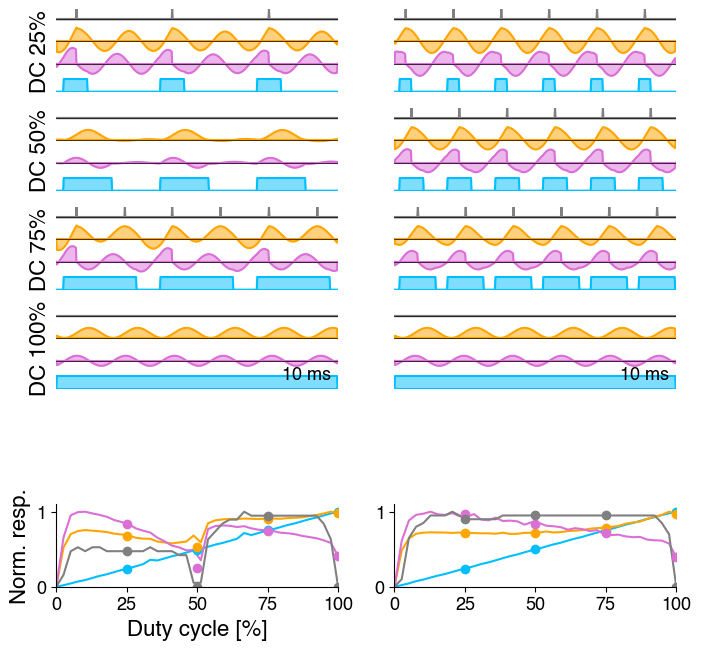

In [7]:
cols = ['deepskyblue', 'orange', 'orchid', 'grey']
custom_cycler = cycler(color=cols)

plt.figure(figsize=(8, 7.5))

for Tcnt, T in enumerate([18.29, 9.15]):
    ppers = T / np.ones((4,))
    pdurs= ppers * np.array([0.25, 0.50, 0.75, 1.00])
    ppaus= ppers - pdurs
    pdcs = pdurs / ppers
    print('ppers', [float(f"{p:1.2f}") for p in (pdurs + ppaus)])
    print('pdurs', [float(f"{p:1.2f}") for p in pdurs])
    print('ppaus', [float(f"{p:1.2f}") for p in ppaus])
    print('pdcs', [float(f"{p:1.2f}") for p in pdcs])

    input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)
    input_stim = np.array(input_stim)
    params = Params.from_yaml('params/raf_20230130_180027_51_params.yaml')
    outs = run_model(input_stim, np.array(params.to_list()), fs)
    tuning_coarse = np.array([np.nanmean(np.clip(out[250:-100, :], 0, np.inf), axis=0) for out in np.array(outs)[[3,0,1,2]]]).T
    pdcs_coarse = pdcs

    t0 = 400
    t1 = t0+530
    print(t0, t1)
    stis = np.arange(len(ppers))
    titles = [f'DC {int(pdc * 100)}%' for pper, pdc in zip(ppers, pdcs)]

    for cnt, (sti, title) in enumerate(zip(stis, titles)):
        ax = plt.subplot(len(ppers) + 2, 2, 2*cnt+1 + Tcnt)
        if Tcnt==0:
            plt.ylabel(title)#, fontdict={'fontsize': 8})
        plotting.pulse(outs[3][t0:t1, sti], c='deepskyblue', dt=dt)
        plotting.pulse(outs[1][t0:t1, sti], offset=2.2, c='orchid', dt=dt)
        plotting.pulse(outs[0][t0:t1, sti], offset=4, c='orange', dt=dt)
        plotting.pulse(outs[2][t0:t1, sti]/30, offset=5.7, c='grey', dt=dt)

        plt.xlim(0 / dt, (t1 - t0)/ dt)
        plt.ylim(0, 6.5)
        plotting.despine('tbrl')

    plotting.scalebar(10, units='ms')


    ppers = T / np.ones((40,))
    ppers = np.array(ppers)
    pdurs= ppers * np.linspace(0, 1, len(ppers))
    ppaus= ppers - pdurs
    pdcs = pdurs / ppers

    input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)
    input_stim = np.array(input_stim)
    params = Params.from_yaml('params/raf_20230130_180027_51_params.yaml')
    outs_all = run_model(input_stim, np.array(params.to_list()), fs)

    tuning = np.array([np.nanmean(np.clip(out[250:-100, :], 0, np.inf), axis=0) for out in np.array(outs_all)[[3,0,1,2]]]).T

    nrm = np.nanmax(tuning, axis=0, keepdims=True)
    ax = plt.subplot(6, 2, 6*2-1+Tcnt)
    ax.set_prop_cycle(custom_cycler)
    plt.plot(100*pdcs, tuning / nrm, '-')
    plt.plot(100*pdcs_coarse, tuning_coarse / nrm, 'o')
    plt.xticks([0, 25, 50,75, 100])
    plt.ylim(0, 1.1)
    plt.yticks([0, 1])
    if Tcnt==0:
        plt.xlabel('Duty cycle [%]')
        plt.ylabel('Norm. resp.')

plt.savefig(f'fig/Fig_raf_dc.pdf')


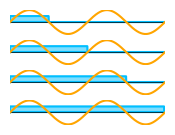

In [8]:
T = np.arange(1000) / 1000
y = np.sin(T * 2 * np.pi * 2)

plt.figure(figsize=(2,1.5))

for c, d in enumerate((250, 500, 750, 995)):
    plt.subplot(4, 1, c + 1)

    # plt.subplot(4,1,c//2 + )
    x = np.concatenate((np.ones(d,), np.zeros(1000 - d,))) / 2
    plotting.pulse(x, dt=1000, c='deepskyblue')
    plt.plot(T, y, c='orange')
    plt.ylim(-1.05, 1.05)
    plotting.despine(which='trbl')

plt.savefig(f'fig/fig_raf_osc_effect.pdf')

